## Подготовка данных

In [1]:
from tensorflow.keras.datasets import mnist # Загрузка библиотеки с базой данных mnist
from tensorflow.keras.models import Sequential # Загружаем библиотеку создания молдели Sequential
from tensorflow.keras.layers import Dense # Загружаем полносвязный слой
from tensorflow.keras.optimizers import Adam # Загружаем оптимизатор Adam
from tensorflow.keras import utils # Загружаем Утилиты to_categorical
from tensorflow.keras.preprocessing import image # для отрисовки изображения
import numpy as np # подключаем библиотеку numpy
import pylab # Модуль для построения графиков
from mpl_toolkits.mplot3d import Axes3D # Модуль для трехмерной графики
import matplotlib.pyplot as plt # отрисовка изображении 
from PIL import Image # Отрисовка изображении
# Отрисовать изображение в ноутбуке а не в консоль или фаил
%matplotlib inline

In [2]:
(x_train_org, y_train_org), (x_test_org, y_test_org) = mnist.load_data() # Загрузка данных mnist

In [3]:
x_train_org[0].shape

(28, 28)

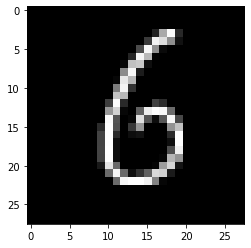

In [4]:
n = 18 # Номер картинки
plt.imshow(Image.fromarray(x_train_org[n]).convert('RGB')) # Отрисовка картинки
plt.show( ) # Вывод картинки

In [5]:
y_train_org[n] # Выводим правильный записанный в обучающую выборку ответ

6

In [6]:
# Меняем формат выходных картинок с 28 х 28 на 784 х 1
x_train = x_train_org.reshape(60000, 784)
x_test = x_test_org.reshape(10000, 784)
print(x_train_org.shape)
print(x_train.shape)

(60000, 28, 28)
(60000, 784)


In [7]:
# Нормализуем входные картинки
x_train = x_train.astype('float32') # преобразуем x train (тренировочную выборку) в тип float (цифры с плавающей точкой)
x_train = x_train / 255 # приводим к значению от 0 до 1
x_test = x_test.astype('float32') # преобразуем x test (тестовую выборку ) в тип float (цифры с плавающей точкой)
x_test = x_test / 255 # приводим к значению в диапазоне от 0 до 1

In [9]:
y_train_org[0]

5

In [10]:
# Преобразуем ответы в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org, 10)
y_test = utils.to_categorical(y_test_org, 10)

In [11]:
# Выводим размер y_train
# 60 тысяч примеров, каждый размера 10 (т.к 10 классов)
print (y_train.shape)

(60000, 10)


In [12]:
print(y_train[0]) # Выводим пример одного выходноо вектора

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [13]:
print(y_train_org.shape)

(60000,)


In [14]:
print(y_train_org[0])

5


## Создание нейронной сети

In [15]:
model = Sequential() # Создаем пустой каркас сети прямого распостранения
model.add(Dense(800, input_dim = 784, activation = 'relu')) # Добавляем полносвязный слой на 800 нейронов с функцией активации relu
model.add(Dense(400, activation = 'relu')) # Добавляем полносвязный слой на 400 нейронов с функцией активации relu
model.add(Dense(10, activation = 'softmax')) # Добавляем полносвязный слой на 10 нейронов с функцией активации softmax

In [16]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy') # Компилируем модель
print(model.summary()) # Выводим структуру модели

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dense_1 (Dense)             (None, 400)               320400    
                                                                 
 dense_2 (Dense)             (None, 10)                4010      
                                                                 
Total params: 952,410
Trainable params: 952,410
Non-trainable params: 0
_________________________________________________________________
None


## Обучение нейнонной сети

In [17]:
# fit - функция обучения нейронки
# x_train, y_train - обучающая выборка, входные и выходные данные
# batch_size - размер батча, количество примеров, которое обрабатывает нейронка перед одним изменением весов
# epochs - количество эпох, когда нейронка обучается на всех примерах выборки
# verbose - 0 не визуализировать ход обучения, 1 - визуализировать
model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1)

Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 0.2090
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0754
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0485
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0323
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0283
Epoch 6/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0232
Epoch 7/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0164
Epoch 8/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0174
Epoch 9/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0123
Epoch 10/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0158
Epoch 11/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0091
Epoch 12/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0097
Epoch 13/20
469/469 [====

In [18]:
model.save_weights('model.h5') # Сохранение модели локально
model.load_weights('model.h5') # Загрузка обученной модели из компьютера

## Распознование рукописных цифр

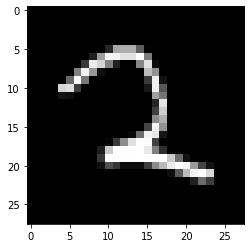

In [19]:
n_rec = 387 # номер тестовой цифры, которую будем распозновать
plt.imshow(Image.fromarray(x_test_org[n_rec]).convert('RGBA')) # Нарисуем картинку из тестового набора под номером n_rec
plt.show()

In [20]:
# Выбираем нужную картинку из тестовой выборки
x = x_test[n_rec]
print(x.shape)

(784,)


In [21]:
# Добавляем одну размерность в конце, чтобы нейронка могла распознать пример
# Потому что нейронка принимает именно массив примеров для распознавания
# Мы делаем массив из одного примера
x = np.expand_dims(x, axis=0)
print(x.shape)

(1, 784)


In [22]:
prediction = model.predict(x) # Распознаём наш пример

1/1 [==============================] - 0s 42ms/step


In [23]:
print(prediction) # Выводим результат, это 10 цифр

[[1.2674714e-12 4.9704293e-11 1.0000000e+00 8.6976398e-11 8.5549413e-19
  9.0300234e-13 4.2716173e-14 8.0587839e-09 2.2847963e-11 3.7950054e-17]]


In [24]:
sum(prediction[0])

1.0000000082205256

In [25]:
pred =np.argmax(prediction) # получаем индекс самого большого элемента (это итоговая цифра, которую распознала сеть)
print(pred)

2


In [26]:
print(y_test_org[n_rec]) # выводим правильный ответ, для сравнения

2
